In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


## **A. Load thư viện**

In [23]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **B. Load tập dữ liệu hoa Iris, chọn tập train và tập test**

Đặc trưng dữ liệu gồm: ['sepal length (cm)', 'sepal width (cm)']
Số dữ liệu tập train: 105 và tập test: 45


Text(0.5, 1.0, 'Dữ liệu tập test')

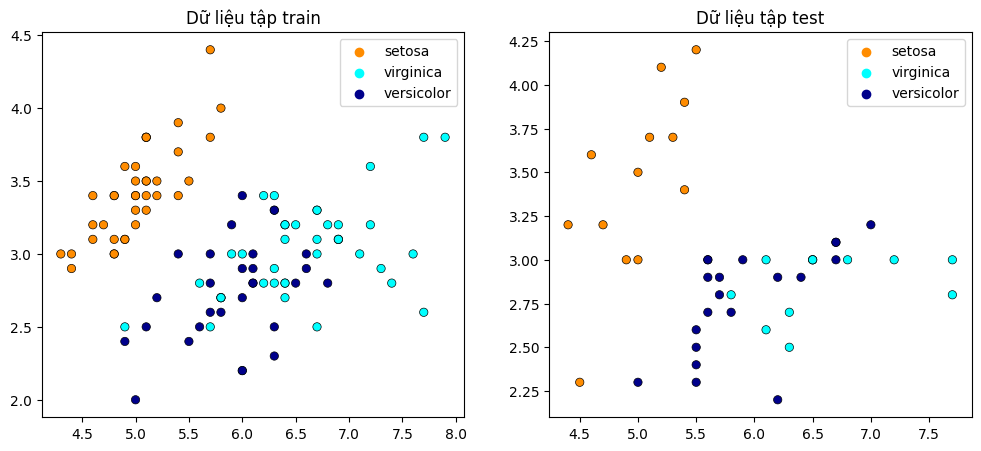

In [2]:
np.random.seed(101)
iris = datasets.load_iris()

print("Đặc trưng dữ liệu gồm:", iris.feature_names[0:2])
X_iris = iris.data[:, :2]
y_iris = iris.target

X_train,X_test,y_train,y_test = train_test_split(X_iris,y_iris,test_size = 0.3)
print("Số dữ liệu tập train: %i và tập test: %i" % (X_train.shape[0], X_test.shape[0]))

cmap = ["darkorange", "cyan", "darkblue"]
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=iris.target_names[y_train], palette=cmap, edgecolor="black")
plt.title("Dữ liệu tập train")

plt.subplot(1,2,2)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=iris.target_names[y_test], palette=cmap, edgecolor="black")
plt.title("Dữ liệu tập test")

> *Nhận xét: Dựa vào 2 đặc trưng chiều dài và chiều rộng đài hoa Iris thì phân loại hoa Setosa khá rõ ràng, còn 2 loại hoa Versicolor, Virginica khó phân biệt hơn.*

## **C. Phân loại K-Nearest Neighbors Classification**

> ### **1. Mô hình KNN, dự đoán và đánh giá độ chính xác**




KNN train với 5 neighbors, trọng số uniform, khoảng cách L2-norm
Độ chính xác phân loại của tập train: 83.81% và tập test: 77.78%
Minh họa dự báo KNN cho một số testpoint


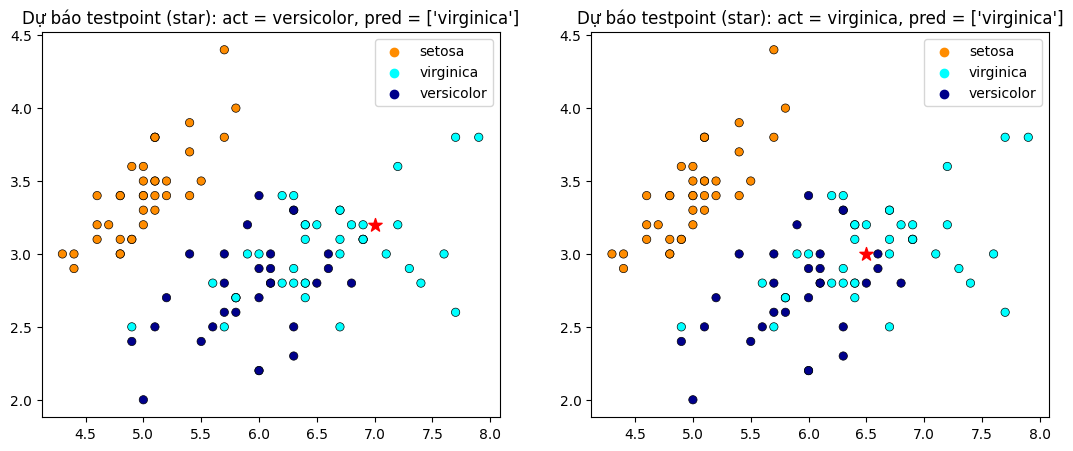

In [3]:
n_neighbors = 5
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform', p=2)
KNN.fit(X_train, y_train)
print("KNN train với %i neighbors, trọng số uniform, khoảng cách L2-norm" % (n_neighbors))

y_train_pred = KNN.predict(X_train)
acc_scr_train = accuracy_score(y_train, y_train_pred)
y_test_pred = KNN.predict(X_test)
acc_scr_test = accuracy_score(y_test, y_test_pred)

print("Độ chính xác phân loại của tập train: %.2f%% và tập test: %.2f%%" % (acc_scr_train*100, acc_scr_test*100))

print("Minh họa dự báo KNN cho một số testpoint")
id_test = [4, 10]
plt.figure(figsize=(13, 5))
for i in range(2):
  X_test_p = [X_test[id_test[i]]]
  y_test_p_pred = KNN.predict(X_test_p)
  y_test_p_exp = y_test[id_test[i]]
  plt.subplot(1,2,i+1)
  plt.scatter(x=X_test_p[0][0], y=X_test_p[0][1], s=100, marker="*", color="red")
  sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=iris.target_names[y_train], palette=cmap, edgecolor="black")
  plt.title("Dự báo testpoint (star): act = %s, pred = %s" % (iris.target_names[y_test_p_exp], iris.target_names[y_test_p_pred]))

> ### **2. Cải tiến KNN theo số neighbor, trọng số vote, khoảng cách các điểm**



> ***a) Thay đổi số neighbors***





In [4]:
K_neighbors = [1,3,5,7,9,11,13]
print("\t K-neighbor \t Độ chính xác tập train \t Độ chính xác tập test")
for k in K_neighbors:
  KNN = neighbors.KNeighborsClassifier(k, weights='uniform', p=2)
  KNN.fit(X_train, y_train)
  y_train_pred = KNN.predict(X_train)
  acc_scr_train = accuracy_score(y_train, y_train_pred)
  y_test_pred = KNN.predict(X_test)
  acc_scr_test = accuracy_score(y_test, y_test_pred)
  print("\t    %2i \t\t\t %.2f%% \t\t\t %.2f%%" % (k, acc_scr_train*100, acc_scr_test*100))

	 K-neighbor 	 Độ chính xác tập train 	 Độ chính xác tập test
	     1 			 95.24% 			 60.00%
	     3 			 90.48% 			 62.22%
	     5 			 83.81% 			 77.78%
	     7 			 82.86% 			 82.22%
	     9 			 81.90% 			 82.22%
	    11 			 83.81% 			 75.56%
	    13 			 79.05% 			 77.78%


> *Hint: Thường chọn số neighbor để độ chính xác phân loại trên tập train và tập test đều cao, chẳng hạn ví dụ trên chọn K = 7, 8, 9*

> ***b) Điều chỉnh trọng số vote các neighbors***

>> Hàm trọng số mũ tham số $\sigma^2$ và trọng số nghịch đảo tham số $\lambda>0$: $$w_i = \exp\Big(-\frac{||z-x_i||^2_2}{\sigma^2}\Big) \quad\quad w_i = \frac{1}{1+\lambda||z-x_i||^2_2} $$




In [5]:
n_neighbors = 5

def exp_weight(dist):
  sigma2 = 0.1
  return np.exp(-dist**2/sigma2)
def inv_weight(dist):
  lamb = 25
  return 1/(1+lamb*(dist**2))

W_vote = ['uniform', 'distance', exp_weight, inv_weight]
W_str = ['uniform', 'distance', 'exp_weight', 'inv_weight']
print("\t Trọng số vote \t Độ chính xác tập train \t Độ chính xác tập test")
for i,w in enumerate(W_vote):
  KNN = neighbors.KNeighborsClassifier(n_neighbors, weights=w, p=2)
  KNN.fit(X_train, y_train)
  y_train_pred = KNN.predict(X_train)
  acc_scr_train = accuracy_score(y_train, y_train_pred)
  y_test_pred = KNN.predict(X_test)
  acc_scr_test = accuracy_score(y_test, y_test_pred)
  print("\t %10s \t\t %.2f%% \t\t\t %.2f%%" % (W_str[i], acc_scr_train*100, acc_scr_test*100))

	 Trọng số vote 	 Độ chính xác tập train 	 Độ chính xác tập test
	    uniform 		 83.81% 			 77.78%
	   distance 		 95.24% 			 64.44%
	 exp_weight 		 85.71% 			 75.56%
	 inv_weight 		 86.67% 			 73.33%


> ***c) Thay đổi khoảng cách tính giữa các điểm dữ liệu***

>> Khoảng cách maximum giữa 2 điểm $x=(x_1,x_2)$ và $y=(y_1,y_2)$: $$metric(x,y)=\max \{|x_1-y_1|, |x_2-y_2|\}$$





In [6]:
n_neighbors = 7

def max_metric(point1, point2): ## Cần nắm rõ dữ liệu train để định nghĩa metric
  m0 = np.absolute(point1[0]-point2[0])
  m1 = np.absolute(point1[1]-point2[1])
  return np.maximum(m0, m1)

metric_list = ['l1','l2','canberra','hamming','braycurtis','haversine', max_metric]
metric_str = ['l1-norm','l2-norm','canberra','hamming','braycurtis','haversine', 'max_metric']
print("\t Khoảng cách metric  \t Độ chính xác tập train \t Độ chính xác tập test")
for i, me in enumerate(metric_list):
  KNN = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric=me)
  KNN.fit(X_train, y_train)
  y_train_pred = KNN.predict(X_train)
  acc_scr_train = accuracy_score(y_train, y_train_pred)
  y_test_pred = KNN.predict(X_test)
  acc_scr_test = accuracy_score(y_test, y_test_pred)
  print("\t %12s \t\t\t %.2f%% \t\t\t %.2f%%" % (metric_str[i], acc_scr_train*100, acc_scr_test*100))

	 Khoảng cách metric  	 Độ chính xác tập train 	 Độ chính xác tập test
	      l1-norm 			 95.24% 			 62.22%
	      l2-norm 			 95.24% 			 66.67%
	     canberra 			 95.24% 			 64.44%
	      hamming 			 95.24% 			 44.44%
	   braycurtis 			 95.24% 			 62.22%
	    haversine 			 95.24% 			 68.89%
	   max_metric 			 95.24% 			 66.67%


> *Note: Tùy theo kiểu dữ liệu (real, integer, binary, boolean, ...) để lựa chọn metric phù hợp.*

> ### **3. Đánh giá và tối ưu mô hình KNN với cross-validation**

> ***a) Đánh giá mô hình KNN qua tập Validation***





Số dữ liệu tập train: 73, tập validation: 32 và tập test: 45


,K_neighbor,Weight_vote,Metric_dist,Train_accuracy,Valid_accuracy,Test_accuracy
10,4,distance,braycurtis,0.972603,0.71875,0.688889
11,4,distance,haversine,0.972603,0.68750,0.733333
12,5,uniform,l1,0.849315,0.78125,0.755556
13,5,uniform,l2,0.821918,0.78125,0.755556
14,5,uniform,canberra,0.808219,0.84375,0.822222
15,5,uniform,hamming,0.602740,0.50000,0.533333
16,5,uniform,braycurtis,0.849315,0.81250,0.733333
17,5,uniform,haversine,0.835616,0.78125,0.733333
18,5,distance,l1,0.972603,0.68750,0.711111
19,5,distance,l2,0.972603,0.68750,0.711111


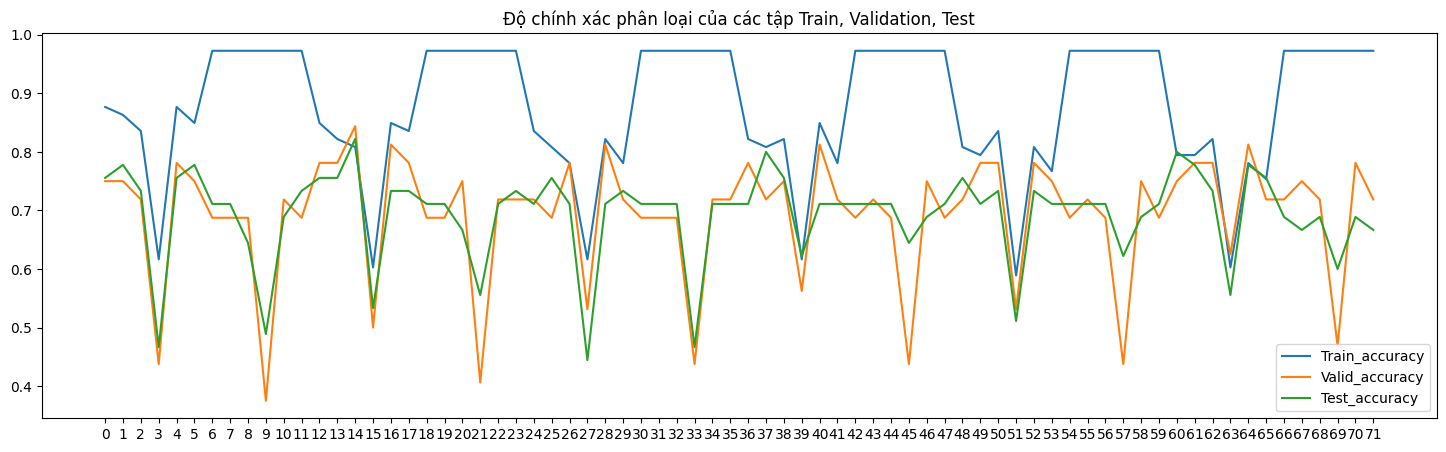

In [35]:
dict_col = {'K_neighbor':[], 'Weight_vote':[], 'Metric_dist':[], 'Train_accuracy':[], 'Valid_accuracy':[], 'Test_accuracy':[]}
DF = pd.DataFrame(dict_col)

X_train_new,X_valid,y_train_new,y_valid = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)
print("Số dữ liệu tập train: %i, tập validation: %i và tập test: %i" % (X_train_new.shape[0], X_valid.shape[0], X_test.shape[0]))

K_neighbors = [4,5,6,7,8,9]
W_vote = ['uniform', 'distance']
metric_list = ['l1','l2','canberra','hamming','braycurtis','haversine']

for k in K_neighbors:
  for w in W_vote:
    for me in metric_list:
      KNN = neighbors.KNeighborsClassifier(n_neighbors=k, weights=w, metric=me)
      KNN.fit(X_train_new, y_train_new)
      y_train_n_pred = KNN.predict(X_train_new)
      acc_scr_train_n = accuracy_score(y_train_new, y_train_n_pred)
      y_valid_pred = KNN.predict(X_valid)
      acc_scr_valid = accuracy_score(y_valid, y_valid_pred)
      y_test_pred = KNN.predict(X_test)
      acc_scr_test = accuracy_score(y_test, y_test_pred)
      DF.loc[len(DF.index)] = [k, w, me, acc_scr_train_n, acc_scr_valid, acc_scr_test]

DF[['Train_accuracy','Valid_accuracy','Test_accuracy']].plot(figsize=(18, 5), title="Độ chính xác phân loại của các tập Train, Validation, Test", xticks=DF.index)
pd.options.display.max_columns = 10
display(DF.loc[10:20])

> *Nhận xét: Theo biểu đồ độ chính xác phân loại của các tập thì trường hợp id = 14 (K-neighbor = 5, weight = 'uniform', metric = 'canberra') cho kết quả dự báo KNN hiệu quả nhất.*

> ***b) Đánh giá mô hình KNN với Cross-validation***

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

## Đánh giá KNN ban đầu
KNN = neighbors.KNeighborsClassifier(n_neighbors=7, weights='uniform')
KNN.fit(X_train, y_train)
y_train_pred = KNN.predict(X_train)
acc_scr_train = accuracy_score(y_train, y_train_pred)

## Đánh giá KNN với cross-validation 5-fold không shuffle tập train
score = cross_val_score(KNN, X_train, y_train, cv=5)

## Đánh giá KNN với cross-validation 5-fold có shuffle tập train
cv_split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
score_shuffle = cross_val_score(KNN, X_train, y_train, cv=cv_split)

print("Đánh giá độ chính xác mô hình KNN trên tập train:")
print("   - Ban đầu (no-validation): %.2f%%" % (acc_scr_train*100))
print("   - Cross-validation, no shuffle: trung bình %.2f%% và độ lệch %.2f%%" % (np.mean(score)*100, np.std(score)*100))
print("   - Cross-validation, shuffle: trung bình %.2f%% và độ lệch %.2f%%" % (np.mean(score_shuffle)*100, np.std(score_shuffle)*100))

Đánh giá độ chính xác mô hình KNN trên tập train:
   - Ban đầu (no-validation): 82.86%
   - Cross-validation, no shuffle: trung bình 79.05% và độ lệch 4.86%
   - Cross-validation, shuffle: trung bình 75.00% và độ lệch 3.95%


> *Note: Số cross_validation chia phụ thuộc vào số dữ liệu tập train, thông thường chọn từ 5 đến 10.*

> ***c) Xác định số neighbor "tốt nhất" cho KNN với Cross-validation***

<ErrorbarContainer object of 3 artists>

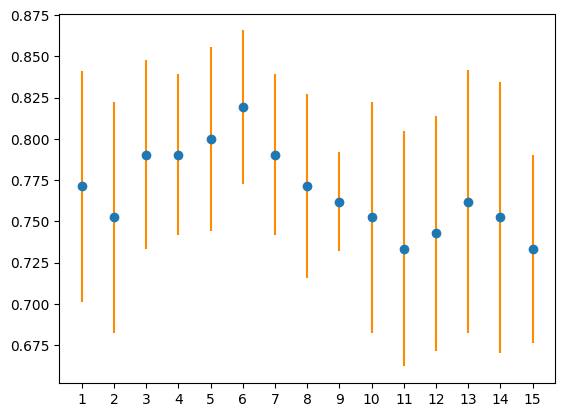

In [78]:
from sklearn.model_selection import cross_val_score

K_neighbors = [k for k in range(1,16)]
scr_mean = []
scr_std = []

for k in K_neighbors:
  KNN = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
  score = cross_val_score(KNN, X_train, y_train, cv=5)
  scr_mean.append(np.mean(score))
  scr_std.append(np.std(score))

plt.xticks(ticks=K_neighbors)
plt.errorbar(x=K_neighbors, y=scr_mean, yerr=scr_std, fmt='o', ecolor="darkorange")

## **D. Hồi quy K-Nearest Neighbors Regression**